In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Serial No.'], inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_tr.shape

(400, 7)

In [20]:
X_te.shape

(100, 7)

In [21]:
y_tr.shape

(400,)

In [22]:
y_te.shape

(100,)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [24]:
X_tr_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2026-01-06 11:38:38.755329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767699519.014804      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767699519.093786      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [42]:
model = Sequential()

model.add(Dense(7, activation='relu',input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176 (704.00 B)

 Trainable params: 176 (704.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
    loss='mean_squared_error',
    optimizer='Adam'
)

In [45]:
history = model.fit(X_tr_scaled, y_tr, epochs=150, validation_split=0.2)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.4421 - val_loss: 0.3576
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3010 - val_loss: 0.2193
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1785 - val_loss: 0.1184
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0965 - val_loss: 0.0593
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0577 - val_loss: 0.0362
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0325 - val_loss: 0.0335
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0299 - val_loss: 0.0326
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0273 - val_loss: 0.0298
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - val_loss: 0.0267
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0252 - val_loss: 0.0245
Epoch 11/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0263 - val_loss: 0.0230
Epoch 12/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - lo

In [46]:
y_pred = model.predict(X_te_scaled)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7e3cccfdf1a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [47]:
from sklearn.metrics import r2_score
r2_score(y_te, y_pred)

0.7591185533790996

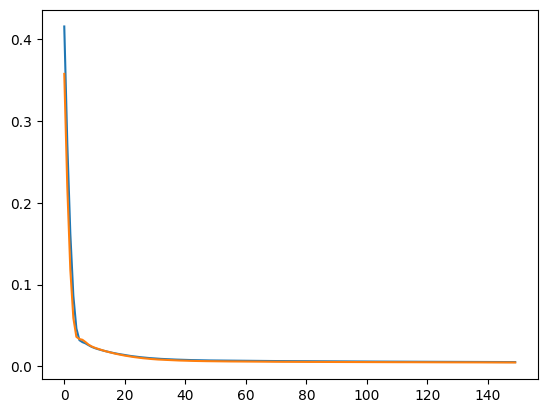

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])